In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:

# Load and clean data
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [33]:
# Handle missing values in TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()


In [34]:
# Encode categorical "Yes/No" columns to 0/1
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

In [35]:

#  Analyze churn rate by categories
contract_churn = df.groupby("Contract")["Churn"].mean()
internet_churn = df.groupby("InternetService")["Churn"].mean()
payment_churn = df.groupby("PaymentMethod")["Churn"].mean()


In [36]:
print("Churn by Contract:\n", contract_churn, "\n")
print("Churn by Internet Service:\n", internet_churn, "\n")
print("Churn by Payment Method:\n", payment_churn, "\n")

Churn by Contract:
 Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64 

Churn by Internet Service:
 InternetService
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: Churn, dtype: float64 

Churn by Payment Method:
 PaymentMethod
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Electronic check             0.452854
Mailed check                 0.192020
Name: Churn, dtype: float64 



Text(0, 0.5, 'Churn Rate')

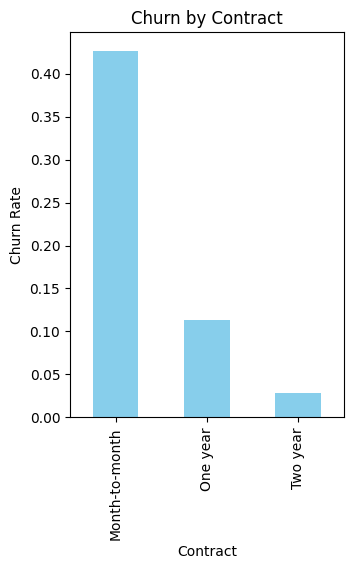

In [37]:
#  Visualize churn patterns
plt.figure(figsize=(12,5))

# Contract
plt.subplot(1,3,1)
contract_churn.plot(kind="bar", color="skyblue", title="Churn by Contract")
plt.ylabel("Churn Rate")

Text(0, 0.5, 'Churn Rate')

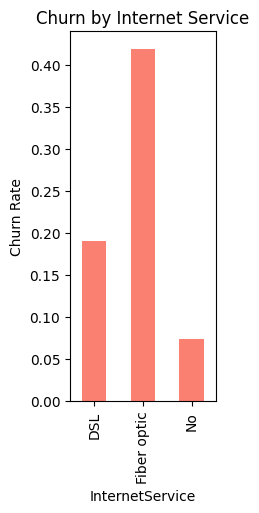

In [38]:
# Internet Service
plt.subplot(1,3,2)
internet_churn.plot(kind="bar", color="salmon", title="Churn by Internet Service")
plt.ylabel("Churn Rate")

Text(0, 0.5, 'Churn Rate')

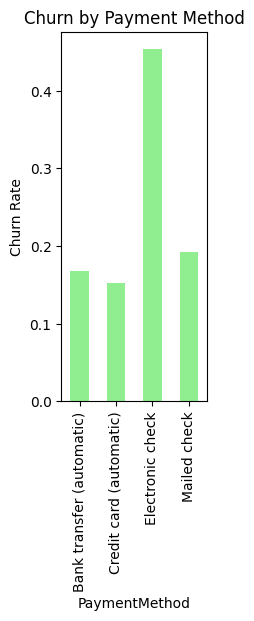

In [39]:

# Payment Method
plt.subplot(1,3,3)
payment_churn.plot(kind="bar", color="lightgreen", title="Churn by Payment Method")
plt.ylabel("Churn Rate")

In [40]:
"""Retention Strategy Suggestions :
Promote longer-term contracts lower churn on 1 or 2-year contracts
Improve internet service reliability especially for Fiber optic users
Offer flexible or discounted payment options Electronic check users churn more"""

'Retention Strategy Suggestions :\nPromote longer-term contracts lower churn on 1 or 2-year contracts\nImprove internet service reliability especially for Fiber optic users\nOffer flexible or discounted payment options Electronic check users churn more'